# REDES NEURONALES CONVOLUCIONALES

> Las Redes Neuronales Convolucionales (CNN) son un tipo de arquitectura de redes neuronales profundas diseñadas específicamente para el procesamiento de datos bidimensionales, como imágenes y vídeos. Han demostrado un rendimiento sobresaliente en una amplia variedad de tareas relacionadas con la visión por computadora. Estas redes revolucionaron el procesamiento de datos al aprender directamente las características relevantes de los datos durante el entrenamiento, en lugar de depender de la extracción manual de características. El nombre "convolucional" proviene de la operación central en la primera capa de estas redes, la convolución. Este enfoque demostró su éxito inicial en tareas como el procesamiento de imágenes y datos similares.

- Necesidad de las convoluciones: 

> En muchas aplicaciones, trabajar directamente con los datos en bruto hace que la tarea sea sencillamente inmanejable. Tomemos el ejemplo de una imagen de matriz 256x256 píxeles, tendríamos un vector de entrada de 65.536 dimensiones. Esto significa que habría aproximadamente 65 millones de parámetros que conectarían cada píxel de entrada con cada nodo de la primera capa, lo que resultaría en una red extremadamente grande y difícil de entrenar. 

La complejidad aumenta aún más con imágenes de alta resolución, como 1000x1000 píxeles, y aún más si se trata de imágenes en color con una representación RGB, ya que cada píxel tendría tres valores (rojo, verde y azul), lo que triplicaría la dimensionalidad de la entrada.

![Convolución](\imagenes\ffff.jpg)

Además, a medida que se añaden capas ocultas, el número de parámetros sigue aumentando. Mientras que al emplear convoluciones, se pueden abordar simultáneamente ambos problemas, es decir, el de la explosión de parámetros y el de la extracción de información estadística útil.

## Características:

- Convolución:  Se realiza en la primera capa de estas redes en lugar del producto interno (también conocido como multiplicación de matrices) que se usaba en las redes neuronales totalmente conectadas o feedforward, anteriormente.

- No solo aprenden los parámetros de la red (los pesos y sesgos de las neuronas) durante el entrenamiento, sino que también aprenden las características directamente de los datos (La red es capaz de identificar automáticamente patrones y características relevantes en los datos sin necesidad de una etapa de preprocesamiento intensiva). 

## Pasos básicos de una red convolucional: 

Los pasos básicos de cualquier red convolucional son:

- Etapa de convolución
- El paso de no linealidad
- El paso de agrupación 

## Etapa de convolución:

![Convolución: Reparto de pesos](\imagenes\convolucion_1.png)

la operación de convolución entre dos matrices $H \in R^{mxm}$ e  $I \in R^{lxl}$ , es otra matriz definida por:

![Salida](\imagenes\formula.png)

El resultado anterior se obtiene si colocamos la matriz $H$ de (2 x 2) sobre $I$, empezando por la esquina superior izquierda. Desde un punto de vista físico, el valor $O(1,1)$ resultante es una media ponderada sobre un área local dentro de la matriz $I$

<div style="text-align: center;">

$O(1,1)=h(1,1)I(1,1)+h(1,2)I(1,2)+h(2,1)I(2,1)+h(2,2)I(2,2)$

$O(1,2)=h(1,1)I(1,2)+h(1,2)I(1,3)+h(2,1)I(2,2)+h(2,2)I(2,3)$

$O(2,1)=h(1,1)I(2,1)+h(1,3)I(2,2)+h(2,1)I(3,1)+h(2,2)I(3,2)$

$O(2,2)=h(1,1)I(2,2)+h(1,3)I(2,3)+h(2,1)I(3,2)+h(2,2)I(3,3)$
    
</div> 

La operación anterior se  conoce como operación de correlación cruzada: operaciones ponderadas sobre los píxeles dentro de un área de ventana de una imagen. se tiene que:

- En otras palabras, $O(i,j)$ contiene información en un área de ventana de la matriz de entrada. 

- El elemento $I(i,j)$ es el elemento superior izquierdo de esta área de la ventana.

- El tamaño de la matriz de salida depende de las suposiciones que se adopten sobre cómo tratar los elementos/píxeles en los bordes de I

- El tamaño de la ventana depende del valor de $m$ 

- Ejemplo:

![Convolución](\imagenes\w.png)

Estas operaciones de filtrado se han utilizado tradicionalmente para generar características a partir de imágenes. La diferencia era que los elementos de la matriz de filtrado se preseleccionaban. Tomemos ejemplo, la siguiente matriz:

In [1]:
from skimage.color import rgb2gray
#Esta función se utiliza para convertir imágenes en color en imágenes en escala de grises.
from skimage.io import imread
# Importa la función imread de la biblioteca scikit-image. Esta función se utiliza para cargar imágenes desde archivos en diversos formatos.
import numpy as np
from scipy import signal
#biblioteca científica que proporciona herramientas para diversas aplicaciones numéricas, incluyendo procesamiento de señales.
import matplotlib.pylab as pylab
#módulo que combina características de NumPy y Matplotlib para una experiencia de usuario similar a la de MATLAB.

In [2]:
# La conversión a tipo flotante puede ser útil si se planea realizar cálculos numéricos o procesamiento de imagen que requieran valores en coma flotante.
im = rgb2gray(imread('imagenes/fotografo.jpeg')).astype(float)

#Esto imprime el valor máximo dentro de la matriz im, que representa el valor de intensidad más alto presente en la imagen.
# #Si la imagen está en escala de grises, este valor generalmente estará en el rango de 0 a 255,
# #donde 0 representa el negro y 255 representa el blanco en una representación de 8 bits
print(im.shape, np.max(im))

(276, 183) 1.0


In [3]:
#Este tipo de kernel se utiliza comúnmente para aplicar un filtro de promedio o desenfoque en una imagen
blur_box_kernel = np.ones((3,3)) / 9
blur_box_kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [4]:
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
edge_laplace_kernel

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

In [5]:
#aplica una convolución entre la imagen im y el kernel blur_box_kernel
im_blurred = signal.convolve2d(im, blur_box_kernel)

In [6]:
#aplica una convolución entre la imagen im y el kernel edge_laplace_kernel
im_edges = np.clip(signal.convolve2d(im, edge_laplace_kernel), 0, 1)

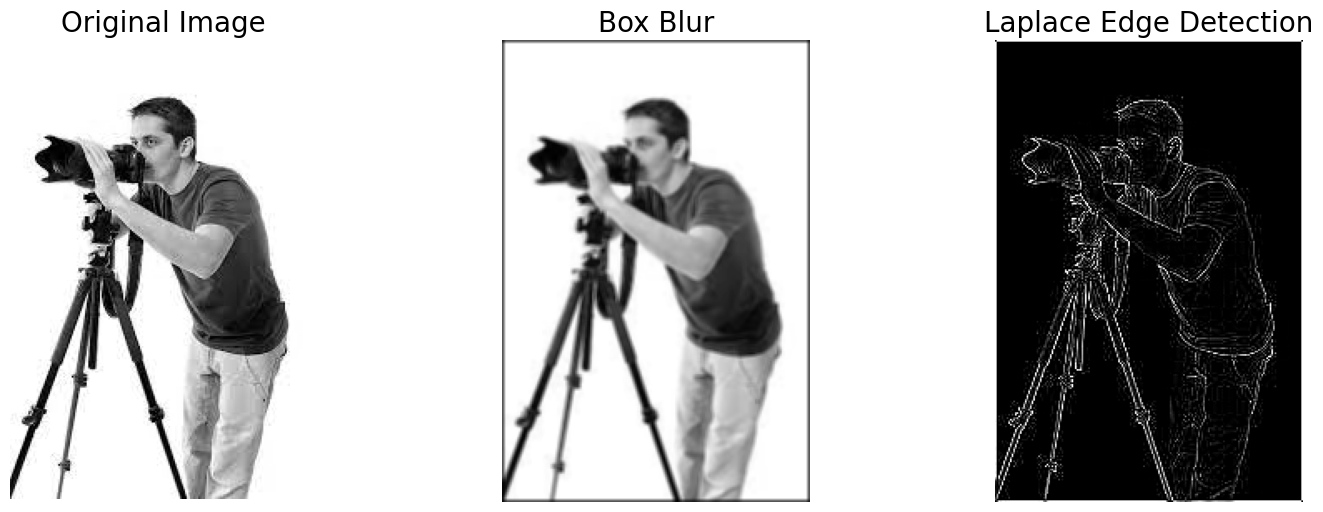

In [7]:
fig, axes = pylab.subplots(ncols=3, sharex=True, sharey=True, figsize=(18, 6))
axes[0].imshow(im, cmap=pylab.cm.gray)
axes[0].set_title('Original Image', size=20)
axes[1].imshow(im_blurred, cmap=pylab.cm.gray)
axes[1].set_title('Box Blur', size=20)
axes[2].imshow(im_edges, cmap=pylab.cm.gray)
axes[2].set_title('Laplace Edge Detection', size=20)
for ax in axes:
    ax.axis('off')

>En lugar de utilizar una única matriz de filtros, empleamos más de una. Cada una de ellas generará un tipo diferente de características. Por ejemplo, una puede generar bordes diagonales, la otra horizontales, etc. Por lo tanto, cada capa oculta comprenderá más de una matriz de filtrado. Los valores de los elementos de cada una de las matrices de filtrado se calcularán durante la fase de entrenamiento, optimizando algún criterio. En otras palabras, cada capa oculta de una CNN genera un conjunto de características de forma óptima.

![Salida](\imagenes\yu.png)

<details>
<summary>leer</summary>

- Profundidad: La profundidad de una capa es el número de matrices de filtro que se emplean en esta capa. No debe confundirse profundidad de la red, que corresponde al número total de capas ocultas utilizadas. A veces, nos referimos al número de filtros como el número de canales.

- Campo receptivo: Cada píxel de una matriz de características de salida resulta como una media ponderada de los píxeles dentro de un área específica de la matriz de imágenes de entrada (o de la salida de la capa anterior). El área específica que corresponde a un píxel se conoce como su campo receptivo.

- Deslizamiento: En la práctica, en lugar de deslizar la matriz de filtros de píxel en píxel, se puede deslizar, por ejemplo, $s$ píxeles. Este valor se conoce como stride. Para valores de $s>1$, se obtienen matrices de mapas de características de menor tamaño.

- Relleno de ceros: A veces, se utilizan ceros para rellenar la matriz de entrada alrededor de los píxeles del borde. De esta forma, la dimensión de la matriz aumenta. Si la matriz original tiene dimensiones.

- Se puede ajustar el tamaño de una matriz de mapa de características de salida ajustando el valor del stride,$s$, y el número de columnas y filas cero adicionales en el relleno. En general, se puede comprobar fácilmente que si $H \in R^{mxm}$ e  $I \in R^{lxl}$ y $p$ es el número de filas y columnas adicionales para el relleno, entonces el mapa de características tiene dimensiones $k$ x $k$, donde: 

$k=\left \lfloor \frac{l+2p-m}{s} +1 \right \rfloor$

y  $\left \lfloor . \right \rfloor$ es el operador suelo. 
</details>

![Salida](\imagenes\qqq.webp)

# El paso de la no linealidad:

Una vez que se han realizado las convoluciones y se ha añadido el término de sesgo a todos los valores del mapa de características, el siguiente paso es aplicar una no linealidad (función de activación) a cada uno de los píxeles de cada matriz de mapas de características.Actualmente, la función de activación lineal rectificada, ReLU, parece ser la más popular.


![Salida](\imagenes\nolineal.png)

# La etapa de agrupación:

El objetivo de este paso es reducir la dimensionalidad de cada matriz de mapas de características. A veces, el paso también se denomina pooling espacial.  Para ello, se define una ventana y se desliza sobre la matriz correspondiente. El deslizamiento puede realizarse adoptando un valor para el respectivo parámetro stride, $s$ . La operación de pooling consiste en elegir un único valor para representar todos los píxeles que se encuentran dentro de la ventana. La operación más utilizada es la agrupación máxima; es decir, entre todos los píxeles que se encuentran dentro de la ventana, el que tiene el valor más alto es seleccionado. Otra posibilidad es la agrupación en la que se selecciona el valor medio de todos los píxeles; a veces se denomina pooling de suma.

![Salida](\imagenes\pooling.png)

![Salida](\imagenes\pooling_invariant.png)

La siguiente figura muestra el efecto de aplicar el pooling a la imagen de la izquierda. Sin duda, los bordes se vuelven más gruesos, pero la información relacionada con los bordes puede extraerse. Nótese que después de la agrupación, el tamaño de la matriz imagen es reducido. Desde otro punto de vista, el polling resume las estadísticas dentro del área pooling. El pooling puede considerarse un tipo especial de filtrado, en el que, en lugar de la convolución, se selecciona el valor máximo (o medio) de la imagen. El pooling ayuda a que la representación sea aproximadamente invariante a pequeñas traslaciones de la entrada.

## Convolución sobre volúmenes:

![Salida](\imagenes\cnnn.png)

Supongamos que la entrada es un volumen de **I** de $l*l*d$. Nótese que, éste comprende  $d$ imágenes, digamos, ** $I_r$ ** , $r=1,2,...d$  cada una de ellas de dimensiones $l*l$. Sea **H** el filtro volumen de $m*m*d$. Este último comprende el conjunto de $d$ imágenes, ** $H_r$ **, $r=1,2,...d$, cada una de dimensiones $m*m$. A continuación, la operación de convolución se define mediante los siguientes pasos:

-  Convolucionar las correspondientes matrices de imágenes bidimensionales para generar $d$ matrices bidimensionales de salida, es decir:

<div style="text-align: center;">

$O_r=I_r \star H_r$,     r=1,2,...,d
    
</div> 

- La convolución de los dos volúmenes, **I** y **H** se define como: 

<div style="text-align: center;">

$\sum_{r=1}^{d}O_r$
    
</div> 

En otras palabras, al convolución de dos volúmenes da como resultado una matriz bidimensional

<div style="text-align: center;">

3D volúmen $\star$ 3D volúmen = 2D array
    
</div>

# Arquitectura CNN completa:

![Salida](\imagenes\cnncom.png)

En la primera capa se emplea un número de volúmenes de filtro (canales) para realizar convoluciones seguidas de la operación no lineal. A continuación, la etapa de pooling toma el relevo para reducir la altura y la anchura de cada volumen de salida, que se utiliza como entrada de la segunda capa, y así sucesivamente. Por último, el volumen de salida de la última capa se vectoriza. A veces, esto también se denomina operación de aplanamiento (flattening: En otras palabras, todos los elementos del volumen de salida se apilan uno debajo de otro para formar un vector)

In [9]:
from keras import regularizers
weight_decay = 1e-4
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(224, 224, 3)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=1, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

NameError: name 'tf' is not defined